## Bike Sharing Assignment

__Problem Statement :__
    
    A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to end.

__The company wants to know:__
    
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands.

__The Solution is divided into the following sections:__
    
    -  Data Understanding and exploration
    -  Data Visualisation
    -  Data Preparation
    -  Model building and evaluation

### Step 1: Data Understanding and exploration :: Reading and Understanding the Data
  Let's start with the following steps:

-  Importing data using the pandas library
-  Understanding the structure of the data

In [11]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [6]:
#Importing dataset

Bike = pd.read_csv(r'C:\Users\indranil1\Desktop\Indranil-Personal\UpGrad 2nd Course - ML\day.csv')

In [3]:
# Check the head of the dataset
# Let's take a look at the first few rows 

Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
# Let's look at the number of rows and columns in the dataset

Bike.shape

(730, 16)

In [23]:
# Understanding the feature name in dataset

Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [27]:
# Summary of the dataset : 730 Rows, 16 Columns, no null values

Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [28]:
# Getting insight of the features

Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Visualisation :: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

-  If there is some obvious multicollinearity going on, this is the first place to catch it
-  Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

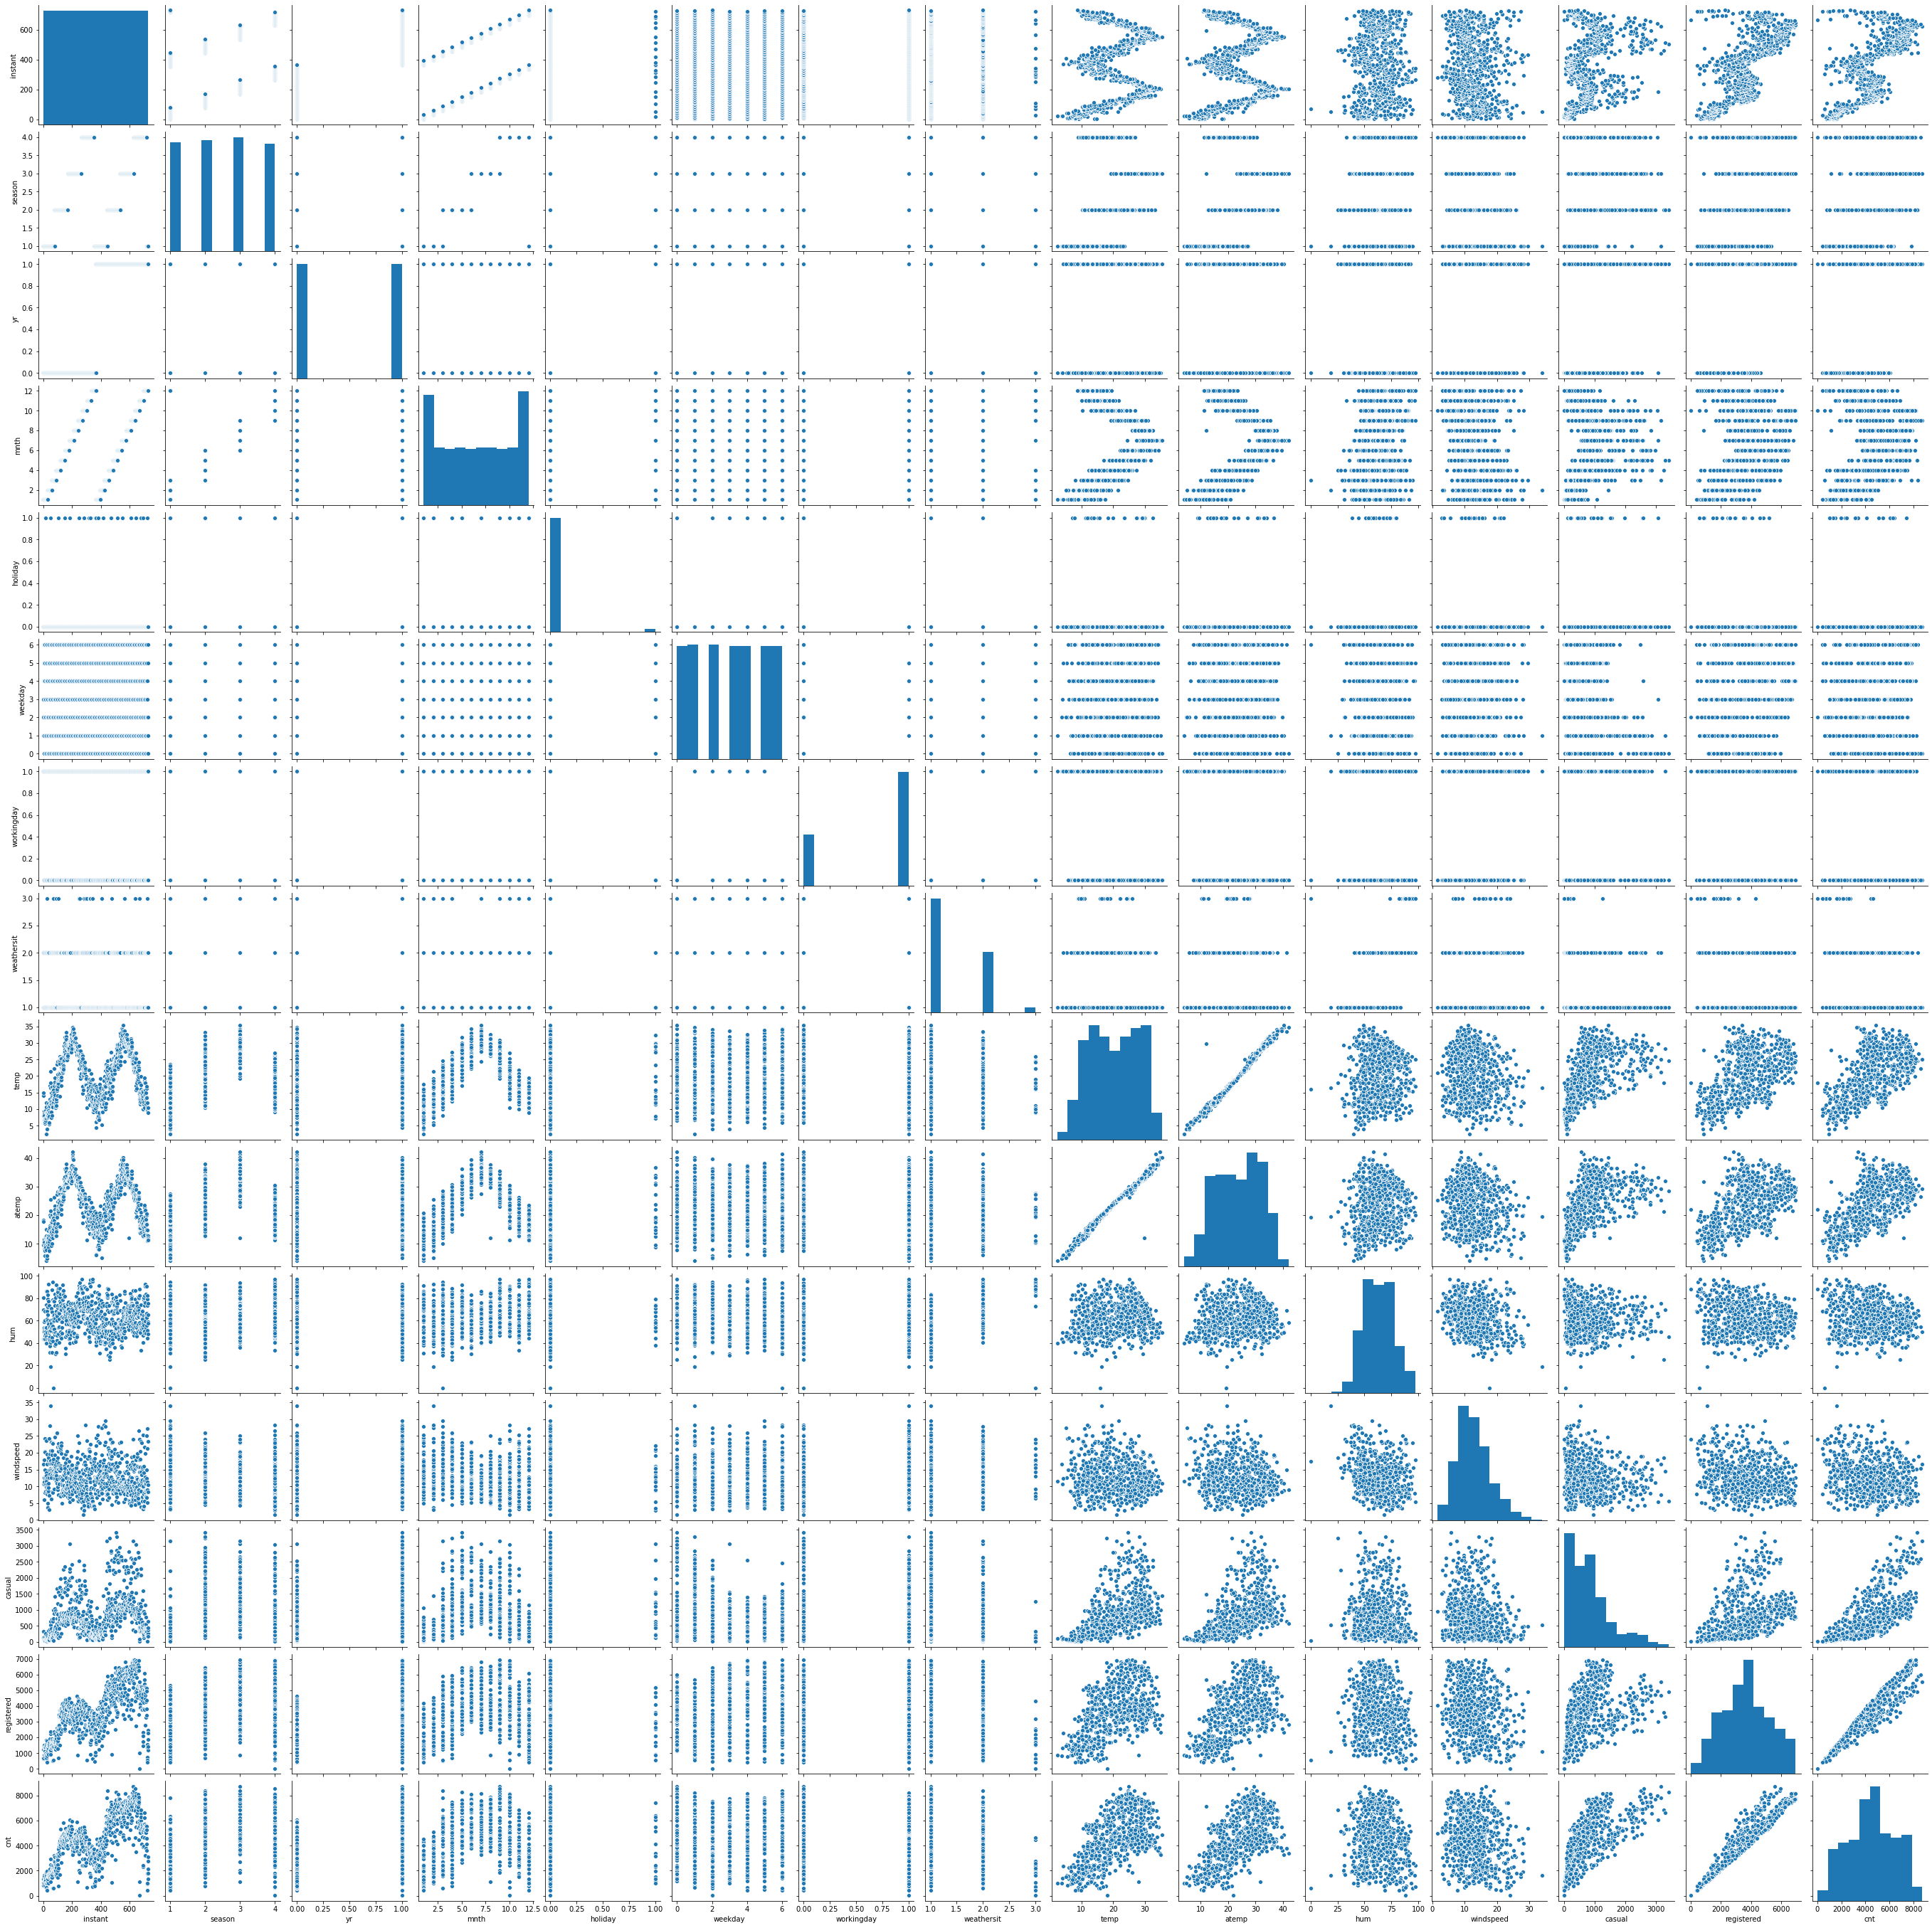

In [19]:
sns.pairplot(Bike)
plt.show()

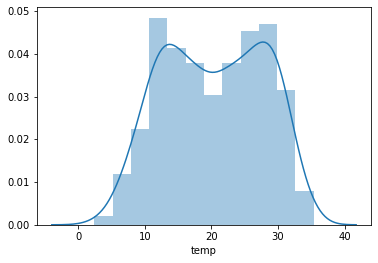

In [38]:
#Temperature
sns.distplot(Bike['temp'])
plt.show()

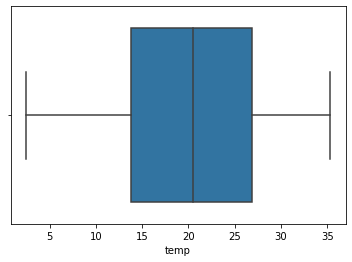

In [45]:
sns.boxplot(Bike['temp'])
plt.show()

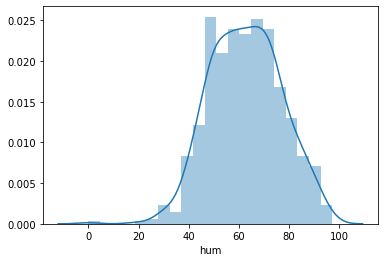

In [39]:
#Humidity
sns.distplot(Bike['hum'])
plt.show()

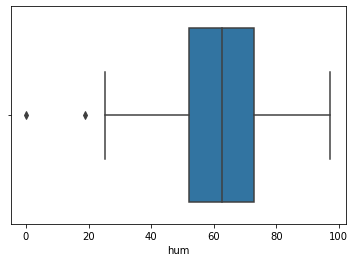

In [42]:
sns.boxplot(Bike['hum'])
plt.show()

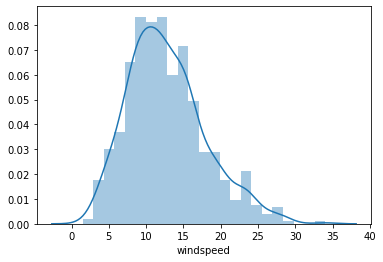

In [40]:
#Wind Speed
sns.distplot(Bike['windspeed'])
plt.show()

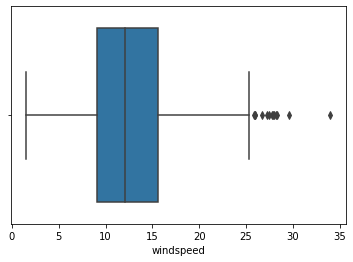

In [41]:
sns.boxplot(Bike['windspeed'])
plt.show()

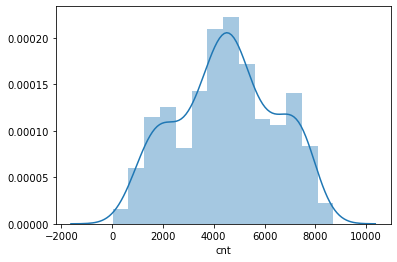

In [47]:
#cnt: count of total rental bikes including both casual and registered
sns.distplot(Bike['cnt'])
plt.show()

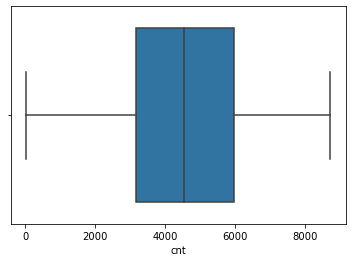

In [48]:
sns.boxplot(Bike['cnt'])
plt.show()

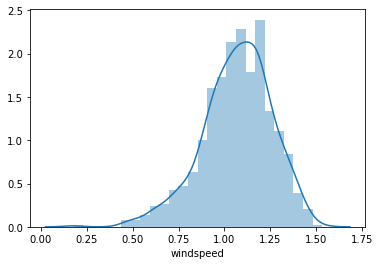

In [34]:
sns.distplot(np.log10(Bike['windspeed']))

-0.5807160633954186


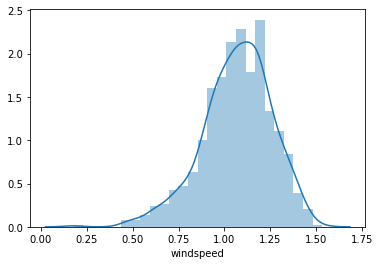

In [37]:
transformed = np.log10(Bike['windspeed'])
sns.distplot(transformed)
print(transformed.skew())

-1.048448789292243


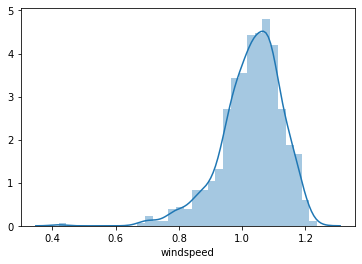

In [39]:
transformed = np.log10(Bike['windspeed'])**0.5
sns.distplot(transformed)
print(transformed.skew())

0.0018911250713877544


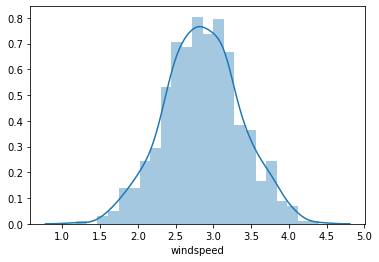

In [7]:
transformed = Bike['windspeed']**0.42
sns.distplot(transformed)
print(transformed.skew())

0.0018911250713877544


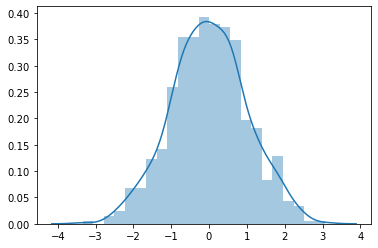

In [8]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
tranformed = pt.fit_transform(Bike[['windspeed']])
sns.distplot(tranformed)
print(transformed.skew())

In [10]:
Bike['transformedwindspeed'] = pt.fit_transform(Bike[['windspeed']])

In [11]:
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,transformedwindspeed
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,-0.284216
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.806461
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.803938
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,-0.286341
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.073819


__Understanding the Data Dictionary and parts of Data Preparation__

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here: 

In [22]:
#Assigning string values to different season instead of numeric values.

#1=spring
Bike.loc[(Bike['season']== 1), 'season'] = 'spring'

#2=summer
Bike.loc[(Bike['season']== 2), 'season'] = 'summer'

#3=fall
Bike.loc[(Bike['season']== 3), 'season'] = 'fall'

#4=winter
Bike.loc[(Bike['season']== 4), 'season'] = 'winter'

In [23]:
#Checking whether the conversion is done properly or not and getting data count on the basis of season
Bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [24]:
#Year (0:2018, 1:2019)
Bike['yr'].astype('category').value_counts()

1    365
0    365
Name: yr, dtype: int64

In [25]:
#Assigning string values to different months instead of numeric values which may misindicate some order to it.

def object_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

Bike[['mnth']] = Bike[['mnth']].apply(object_map)

In [26]:
Bike['mnth'].astype('category').value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [27]:
#Assigning string values to weekdays instead of numeric values which may misindicate some order to it.

def str_map(x):
    return x.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 7:'Tues'})

Bike[['weekday']] = Bike[['weekday']].apply(str_map)

In [28]:
Bike['weekday'].astype('category').value_counts()

Wed      105
Thurs    105
Sun      104
Sat      104
Mon      104
Fri      104
Name: weekday, dtype: int64

In [29]:
#if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
Bike['workingday'].astype('category').value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [30]:
#Replacing long weathersit names into string values for better readability and understanding

#1: Clear, Few clouds, Partly cloudy, Partly cloudy
Bike.loc[(Bike['weathersit']== 1), 'weathersit'] = 'A'

#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
Bike.loc[(Bike['weathersit']== 2), 'weathersit'] = 'B'    

#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
Bike.loc[(Bike['weathersit']== 3), 'weathersit'] = 'C'

#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
Bike.loc[(Bike['weathersit']== 4), 'weathersit'] = 'D'

In [32]:
Bike['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [33]:
Bike['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [49]:
#Converting Date to Datetime format
Bike['dteday'] = Bike['dteday'].astype('datetime64')

In [50]:
#All Categorical Variable in the dataset 
Bike_categorical = Bike.select_dtypes(exclude=['float64','datetime64','int64'])
print(Bike_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [51]:
Bike_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,NaN,B
728,spring,Dec,Wed,A


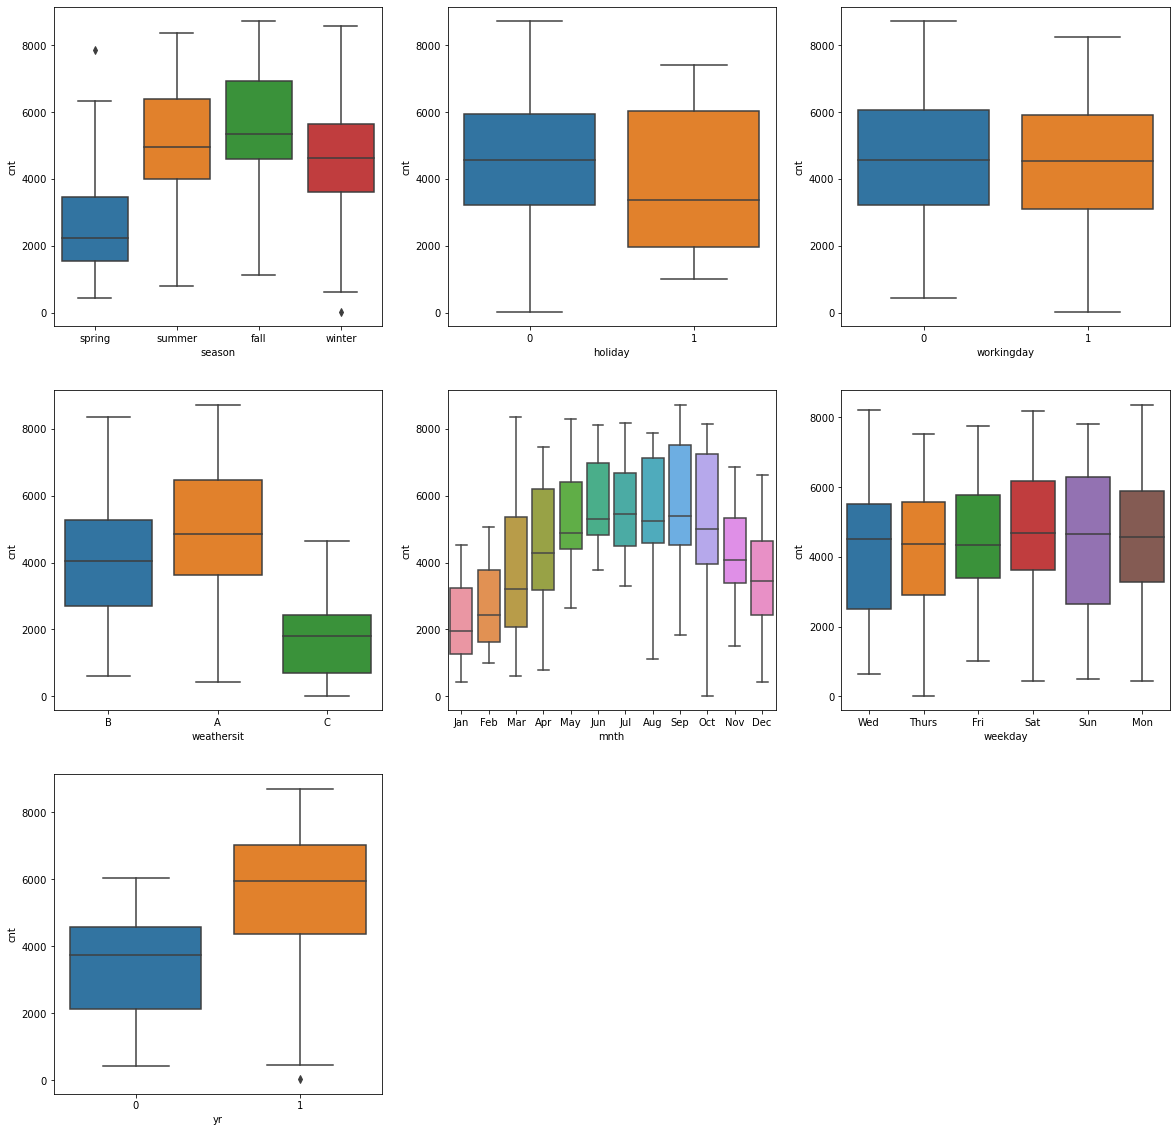

In [54]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt', data=Bike)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt', data=Bike)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt', data=Bike)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt', data=Bike)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt', data=Bike)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=Bike)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt', data=Bike)
plt.show()

__Visualising Numeric Variables__

In [55]:
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    Bike[var] = Bike[var].astype("float")

In [57]:
#All numeric variables in the dataset

Bike_numeric = Bike.select_dtypes(include=['float64'])
Bike_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,transformedwindspeed
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0,-0.284216
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0,0.806461
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0,0.803938
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0,-0.286341
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0,0.073819


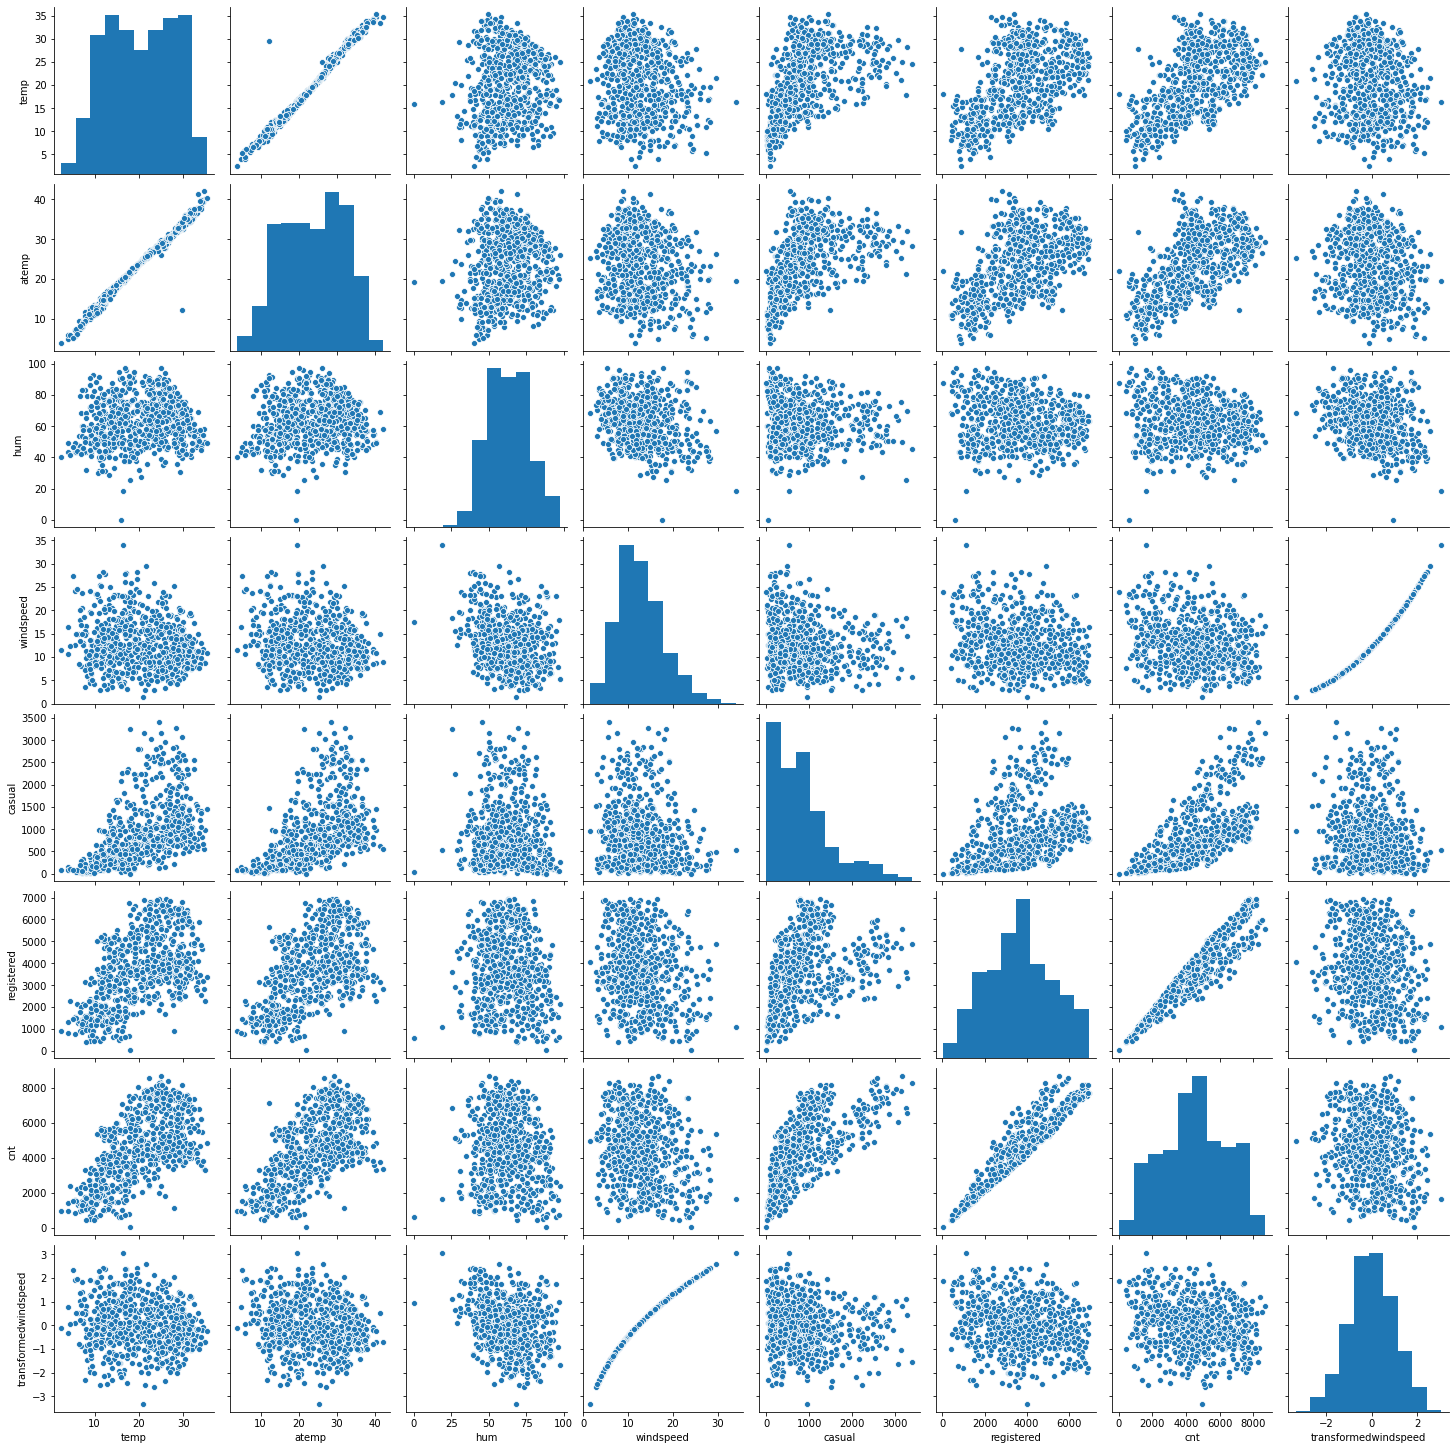

In [58]:
#Pairwise Scatter Plot
sns.pairplot(Bike_numeric)
plt.show()

In [60]:
#Correlation Matrix
cor = Bike_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt,transformedwindspeed
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,-0.136005
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,-0.162417
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,-0.250221
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,0.986276
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,-0.153248
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,-0.206452
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,-0.220668
transformedwindspeed,-0.136005,-0.162417,-0.250221,0.986276,-0.153248,-0.206452,-0.220668,1.000000


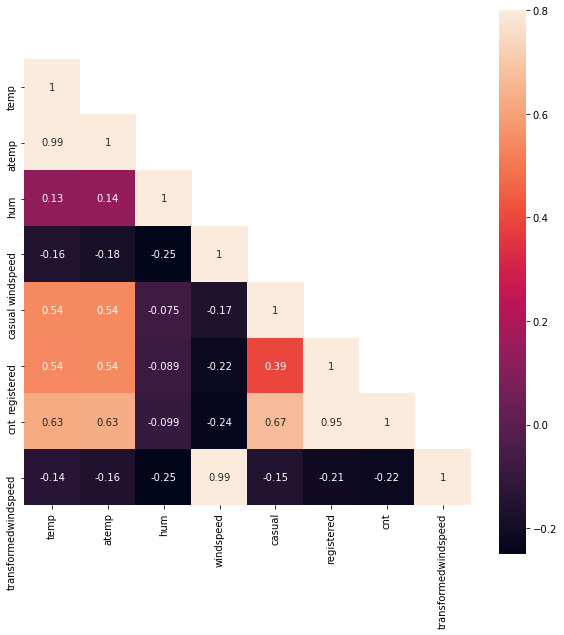

In [62]:
#Heatmap

mask= np.array(cor)
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=.8,square=True,annot=True)
plt.show()

The Heatmap shows some useful insights:
    
    Correlation of Count('cnt') with independent variables:
        -  Count('cnt') is highly positively correlated with 'casual' and 'registered' and further it is high with 'atemp'.
        -  Count('cnt') is negatively correlated with 'windspeed' (-0.24 approx)
        -  Some of the independent variables are highly correlated : 'atemp' and 'temp'

    Thus, while building the model, we'll have to pay attention to multicollinearity.

In [65]:
#removing atemp as it is highly correlated with temp
Bike.drop('atemp',axis=1,inplace=True)

### Step 3 : Data Preparation

In [66]:
#Subset of all categorical variables
Bike_categorical=Bike.select_dtypes(include=['object'])

__Dummy Variables__

The Variable season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers.

In [63]:
#Convert into dummies

Bike_dummies = pd.get_dummies(Bike_categorical, drop_first=True)
Bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
#Drop categorical variables columns

Bike = Bike.drop(list(Bike_categorical.columns), axis=1)

In [68]:
#Concatenate dummy variables with Original Dataframe
Bike = pd.concat([Bike,Bike_dummies],axis=1)

In [69]:
Bike.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,0,0,0,0,1,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,1,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,1,0,0,0,0


### Model building and evaluation

In [72]:
#Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(Bike, train_size=0.7, test_size=0.3, random_state=100)

In [73]:
df_train

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Wed,weathersit_B,weathersit_C
653,654,2019-10-16,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,...,0,1,0,0,0,0,0,0,0,0
576,577,2019-07-31,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,...,0,0,0,0,0,0,0,0,0,0
426,427,2019-03-03,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,...,0,0,0,0,0,0,0,0,1,0
728,729,2019-12-30,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,...,0,0,0,0,0,0,0,1,0,0
482,483,2019-04-28,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,527,2019-11-06,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,...,0,0,0,0,0,0,1,0,1,0
578,579,2019-02-08,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,...,0,0,0,0,0,1,0,0,0,0
53,54,2018-02-23,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,...,0,0,0,0,0,1,0,0,0,0
350,351,2018-12-17,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,...,0,0,0,0,0,0,0,1,1,0
